In [22]:
import pandas as pd
names = ['SepalLength', 'SepalWidth',
         'PetalLength', 'PetalWidth',
         'Class']
df = pd.read_csv('iris.data', names=names)

In [23]:
print("Linhas: %d, Colunas: %d" % (len(df), len(df.columns)))


Linhas: 150, Colunas: 5


In [24]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Class'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

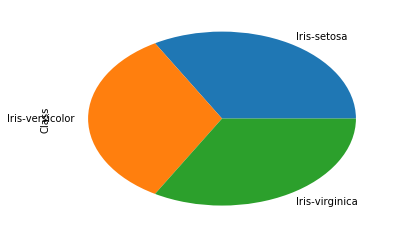

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df['Class'].value_counts().plot(kind='pie');

In [12]:
df['SepalArea'] = df['SepalLength'] * df['SepalWidth']
df['PetalArea'] = df['PetalLength'] * df['PetalWidth']

df['SepalLengthAboveMean'] = df['SepalLength'] > df['SepalLength'].mean()
df['SepalWidthAboveMean'] = df['SepalWidth'] > df['SepalWidth'].mean()

df['PetalLengthAboveMean'] = df['PetalLength'] > df['PetalLength'].mean()
df['PetalWidthAboveMean'] = df['PetalWidth'] > df['PetalWidth'].mean()
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,SepalArea,PetalArea,SepalLengthAboveMean,SepalWidthAboveMean,PetalLengthAboveMean,PetalWidthAboveMean
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28,False,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28,False,False,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26,False,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30,False,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28,False,True,False,False


In [13]:
features = df.columns.difference(['Class'])

x = df[features].values
y = df['Class'].values

In [14]:

sample1 = [1.0, 2.0, 3.5, 1.0, 10.0, 3.5, False, False, False, False]

sample2 = [5.0, 3.5, 1.3, 0.2, 17.8, 0.2, False, True, False, False]

sample3 = [7.9, 5.0, 2.0, 1.8, 19.7, 9.1, True, False, True, True]

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state=1986,
                                      criterion='gini',
                                      max_depth=3)
classifier_dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1986,
            splitter='best')

In [17]:
classifier_dt.predict([sample1, sample2, sample3])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(classifier_dt, x, y,
                            scoring='accuracy', cv=5)

In [21]:
print(scores_dt.mean())

0.9533333333333334


In [29]:
from sklearn.ensemble import RandomForestClassifier
classfier_rf = RandomForestClassifier (random_state=1986,
                                      criterion='gini',
                                      max_depth=10,
                                      n_estimators=50,
                                      n_jobs=-1)
scores_rf = cross_val_score(classfier_rf, x, y,
                           scoring='accuracy', cv=5)

print(scores_rf.mean())

0.96


In [31]:
classfier_rf.fit(x, y) 

features_importance = zip(classfier_rf.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

PetalArea: 31.999611%
PetalWidth: 28.825871%
PetalLength: 21.523382%
PetalLengthAboveMean: 7.121078%
SepalLength: 3.085491%
SepalArea: 2.714643%
SepalWidth: 2.038964%
PetalWidthAboveMean: 1.668686%
SepalLengthAboveMean: 0.864057%
SepalWidthAboveMean: 0.158217%


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            "criterion": ['entropy', 'gini'],
            "n_estimators": [25, 50, 75],
            "bootstrap": [False, True],
            "max_depth": [3, 5, 10],
            "max_features": ['auto', 0.1, 0.2, 0.3]
}
grid_search = GridSearchCV(classfier_rf, param_grid, scoring="accuracy")
grid_search.fit(x, y)

classfier_rf = grid_search.best_estimator_ 
grid_search.best_params_, grid_search.best_score_